## 📊 Análisis de Ventas y Canales de Distribución en el rubro farmacéutico 
### Proyecto Final – Data Science (Entrega N° 1)

Autor/a: Rubis Becerra

### Abstract

El presente proyecto tiene como objetivo analizar el comportamiento de las ventas de una empresa a partir de un conjunto de datos compuesto por 5.000 registros y 21 variables, que incluyen información sobre distribuidores, clientes, ubicación geográfica, canales de venta, productos, equipos comerciales y métricas de desempeño. El dataset combina variables categóricas y numéricas, lo que permite realizar un análisis exploratorio de datos (EDA) integral, orientado a identificar patrones, tendencias y posibles factores que influyen en el nivel de ventas.

La pregunta problema que guía este estudio es: ¿Qué factores influyen en el nivel de ventas de la empresa, considerando el canal de distribución, la frecuencia de las ventas, la ubicación geográfica y el equipo comercial? Para abordarla, se formularon preguntas e hipótesis de interés relacionadas con la concentración de ventas por canal y la distribución de los niveles de ventas. En particular, se plantea que las ventas clasificadas como altas tienden a concentrarse en determinados canales de distribución y que, si bien las ventas bajas son más frecuentes, las ventas altas se distribuyen en rangos de mayor magnitud.

Durante esta primera etapa del proyecto se realizó un proceso de limpieza y preparación de los datos, identificando valores faltantes en variables clave como ventas, cantidad, ubicación y personal comercial. Asimismo, se incorporaron variables derivadas como Sales_Level, Sales_Performance y High_Sales_Flag, las cuales permiten clasificar las ventas y facilitar análisis posteriores de tipo descriptivo y predictivo.

El análisis exploratorio se apoyó en resúmenes estadísticos y visualizaciones univariadas, bivariadas y multivariadas, incluyendo gráficos de barras, histogramas y gráficos en escala logarítmica. Estas visualizaciones permitieron observar que la distribución de las ventas presenta un fuerte sesgo a la derecha, caracterizado por una alta frecuencia de ventas bajas y medias, y una menor cantidad de ventas de gran magnitud. En conjunto, los resultados obtenidos en esta primera entrega sientan las bases para análisis más avanzados en etapas posteriores, incluyendo modelos de clasificación y técnicas de machine learning orientadas a la predicción del nivel de ventas.

### Pregunta Problema

¿Qué factores influyen en el nivel de ventas de la empresa, considerando el canal de distribución, la frecuencia de las ventas, la ubicación geográfica y el equipo comercial?

### Preguntas e Hipótesis de Interés

- ¿Qué canales de venta concentran mayores niveles de ventas?
- ¿Cómo se distribuyen los niveles de ventas y su frecuencia?

Hipótesis iniciales:
- Las ventas clasificadas como altas se concentran en determinados canales de distribución.
- Las ventas bajas son más frecuentes contrario a las ventas altas pero se distribuyen en rangos de mayor magnitud.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("../data/pharma_rsn1.csv")

In [41]:
df.head(3)

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,...,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team,Sales_Level,Sales_Performance,High_Sales_Flag
0,Prohaska-Kuhic,"Wunsch, Mills and Walter",Kielce,Poland,50.8725,20.6319,Pharmacy,Institution,Tacrodomide,Antipiretics,...,420,4200.0,January,2018,Stella Given,Alisha Cordwell,Charlie,Medias,Bajo,0
1,Cassin,Block-Romaguera Pharmaceutical Limited,Tarnowskie Góry,Poland,50.4500,18.8667,Hospital,Private,Finanel,Antimalarial,...,206,4120.0,January,2018,Sheila Stones,Britanny Bold,Delta,Medias,Bajo,0
2,Smith Inc,Doyle-Tillman Pharmaceutical Ltd,Dęblin,Poland,51.5667,21.8614,Hospital,Private,Tacrodomide,Antipiretics,...,420,840.0,January,2018,Stella Given,Alisha Cordwell,Charlie,Bajas,Bajo,0


In [42]:
df.shape

(5000, 21)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distributor        5000 non-null   object 
 1   Customer Name      5000 non-null   object 
 2   City               5000 non-null   object 
 3   Country            5000 non-null   object 
 4   Latitude           4750 non-null   float64
 5   Longitude          4750 non-null   float64
 6   Channel            5000 non-null   object 
 7   Sub-channel        5000 non-null   object 
 8   Product Name       5000 non-null   object 
 9   Product Class      5000 non-null   object 
 10  Quantity           4550 non-null   float64
 11  Price              5000 non-null   int64  
 12  Sales              4400 non-null   float64
 13  Month              5000 non-null   object 
 14  Year               5000 non-null   int64  
 15  Name of Sales Rep  4750 non-null   object 
 16  Manager            4550 

In [44]:
df.isna().sum()

Distributor            0
Customer Name          0
City                   0
Country                0
Latitude             250
Longitude            250
Channel                0
Sub-channel            0
Product Name           0
Product Class          0
Quantity             450
Price                  0
Sales                600
Month                  0
Year                   0
Name of Sales Rep    250
Manager              450
Sales Team             0
Sales_Level           50
Sales_Performance      0
High_Sales_Flag        0
dtype: int64

In [45]:
#Se tratan los valores nulos de latitude y longitude imputando con la media de esos valores por ciudad
def imputar_media(x):
    return x.fillna(x.mean())

df[['Latitude', 'Longitude']] = (
    df.groupby('City')[['Latitude', 'Longitude']]
      .transform(imputar_media)
)

In [46]:
#Se imputan los valores nulos de quantity con la mediana de la columna. 
#Se usa .loc y evitó inplace=True para prevenir problemas de chained assignment y asegurar compatibilidad con versiones futuras de pandas.

df.loc[:, 'Quantity'] = df['Quantity'].fillna(df['Quantity'].median())

In [47]:
#Se tratan los valores nulos de Sales recalculando dicha variable.
df['Sales'] = df['Quantity'] * df['Price']

In [48]:
#Se tratan los valores nulos de Name of Sales Rep y Manager rellenando con la moda para ambas variables.
def imputar_moda(x):
    return x.fillna(x.mode()[0])

df['Name of Sales Rep'] = (
    df.groupby('Sales Team')['Name of Sales Rep']
      .transform(imputar_moda)
)

df['Manager'] = (
    df.groupby('Sales Team')['Manager']
      .transform(imputar_moda)
)

In [49]:
#Para tratar valores nulos en Sales Level se verifican los valores que contiene
df.Sales_Level.unique()

array(['Medias', 'Bajas', 'Altas', nan], dtype=object)

In [50]:
#Se considerarán percentiles.
df['Sales'].describe()

count    5.000000e+03
mean     3.777200e+04
std      1.423987e+05
min     -2.866420e+05
25%      1.880750e+03
50%      6.224500e+03
75%      1.914825e+04
max      3.333960e+06
Name: Sales, dtype: float64

In [51]:
#Se recalculó la variable Sales_Level para todos los registros a partir de percentiles de la distribución de Sales, garantizando consistencia y evitando sesgos en la clasificación.
q33 = df["Sales"].quantile(0.33)
q66 = df["Sales"].quantile(0.66)

df["Sales_Level"] = pd.cut(
    df["Sales"],
    bins=[-float("inf"), q33, q66, float("inf")],
    labels=["Bajas", "Medias", "Altas"]
)

In [52]:
#Se verifica nuevamente que no hayan quedado valores nulos.
df.isna().sum()

Distributor          0
Customer Name        0
City                 0
Country              0
Latitude             3
Longitude            3
Channel              0
Sub-channel          0
Product Name         0
Product Class        0
Quantity             0
Price                0
Sales                0
Month                0
Year                 0
Name of Sales Rep    0
Manager              0
Sales Team           0
Sales_Level          0
Sales_Performance    0
High_Sales_Flag      0
dtype: int64

In [53]:
#Se tratan los valores nulos que quedan para las variables latitude y longitude con la media de esos valores por país 
def imputar_media(x):
    return x.fillna(x.mean())

df[['Latitude', 'Longitude']] = (
    df.groupby('Country')[['Latitude', 'Longitude']]
      .transform(imputar_media)
)

In [54]:
#Se verifica.
df.isna().sum()

Distributor          0
Customer Name        0
City                 0
Country              0
Latitude             0
Longitude            0
Channel              0
Sub-channel          0
Product Name         0
Product Class        0
Quantity             0
Price                0
Sales                0
Month                0
Year                 0
Name of Sales Rep    0
Manager              0
Sales Team           0
Sales_Level          0
Sales_Performance    0
High_Sales_Flag      0
dtype: int64

### EDA

In [55]:
df.describe()

,Latitude,Longitude,Quantity,Price,Sales,Year,High_Sales_Flag
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,50.985747,10.837782,97.135667,414.762400,3.777200e+04,2018.395000,0.164200
std,1.611336,4.167365,477.799034,225.105107,1.423987e+05,1.037299,0.370494
min,47.514200,6.083800,-1800.000000,22.000000,-2.866420e+05,2017.000000,0.000000
25%,49.891700,7.940800,6.000000,206.000000,1.880750e+03,2018.000000,0.000000
50%,51.123600,9.397800,20.000000,445.000000,6.224500e+03,2018.000000,0.000000
75%,52.091700,12.150800,50.000000,610.000000,1.914825e+04,2019.000000,0.000000
max,54.781900,23.566700,20000.000000,794.000000,3.333960e+06,2020.000000,1.000000


### Gráfico de barras: Ventas por Canal y Nivel de Ventas

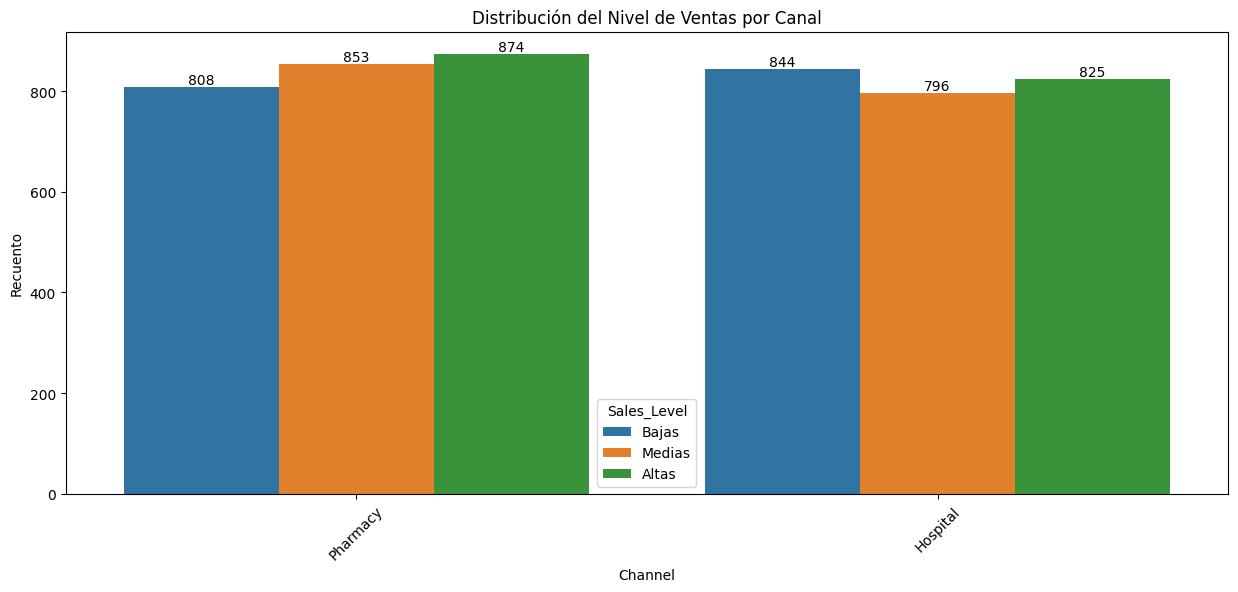

In [56]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df,x="Channel",hue="Sales_Level")
plt.title("Distribución del Nivel de Ventas por Canal")
plt.xticks(rotation = 45)
plt.ylabel("Recuento")
#Agregar etiquetas de datos para mejorar la visualización
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Diagnóstico - Distribución del Nivel de Ventas por Canal
¿Cuáles canales de venta concentran mayores niveles de ventas?

El gráfico muestra que el canal Pharmacy concentra una mayor proporción de ventas clasificadas como altas, seguida por las categorias de ventas medias y bajas con una distribución equilibrada entre estas. La diferencias entre ambos canales de distribución se considera moderada.

### Histograma de Ventas

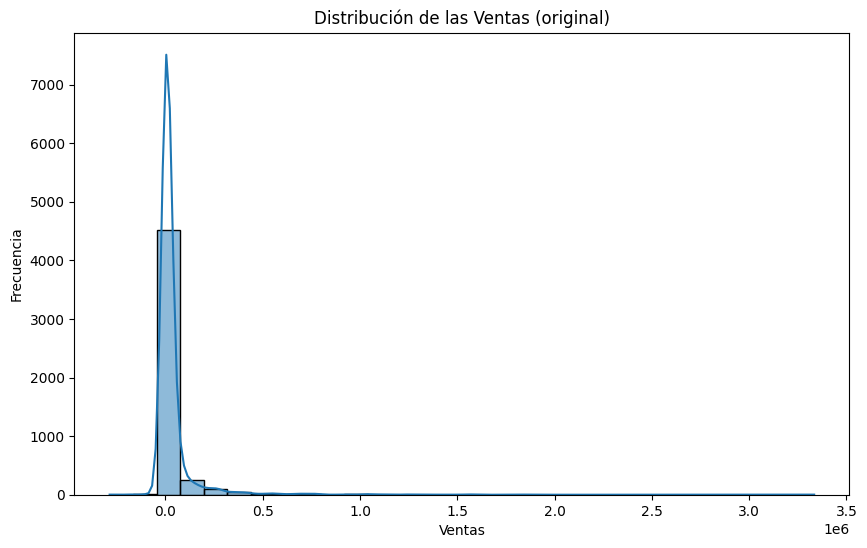

In [57]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df,
    x="Sales",
    bins=30,
    kde=True
)

plt.title("Distribución de las Ventas (original)")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")

plt.show()

### Comentarios Histograma (original)

Muestra una fuerte concentración de ventas en valores bajos y la presencia de algunos valores extremadamente altos, lo que genera una distribución asimétrica positiva. Esta situación dificulta la visualización de los valores intermedios y evidencia la existencia de outliers que influyen en las medidas de tendencia central. Un pequeño número de ventas concentra una parte significativa del volumen total.

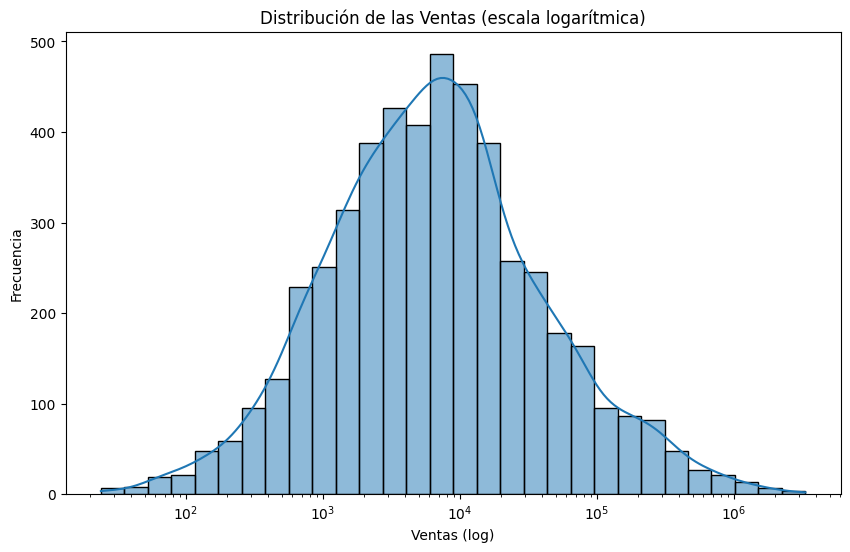

In [58]:
#La variable Sales tiene valores de ventas negativas, para una mejor visualización se utilizó una escala logarítmica, considerando únicamente ventas positivas.
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df[df["Sales"] > 0],
    x="Sales",
    bins=30,
    kde=True,
    log_scale=True
)
plt.title("Distribución de las Ventas (escala logarítmica)")
plt.xlabel("Ventas (log)")
plt.ylabel("Frecuencia")
plt.show()

### Comentarios Histograma (escala logarítmica)

La forma de la distribución se aproxima a una campana, se observa que la mayor frecuencia de ventas se concentra alrededor de 10000.00, siendo este el valor típico de las operaciones de ventas positivas. Los valores extremos tanto en mínimos y máximos son menos frecuentes.

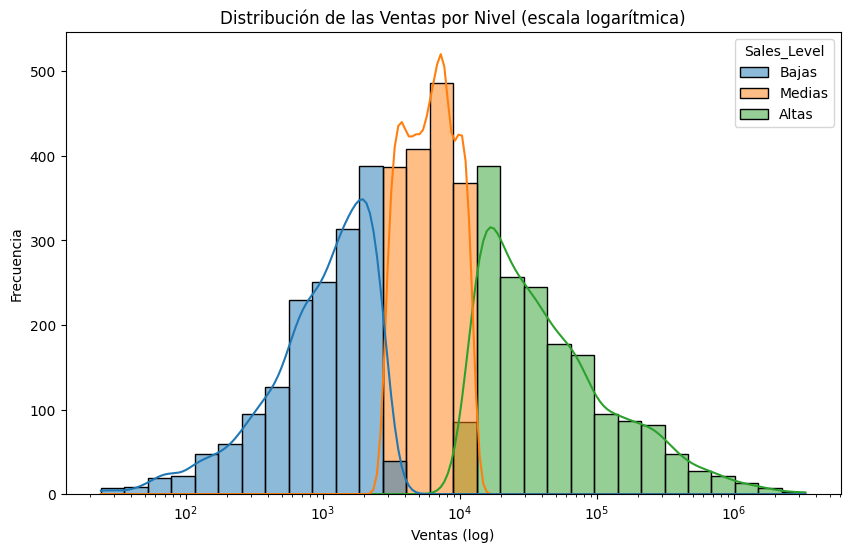

In [59]:
#Se usa el Histograma con escala logarítmica para comparar con frecuencia de ventas con el nivel de ventas.
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df[df["Sales"] > 0],
    x="Sales",
    bins=30,
    kde=True,
    log_scale=True,
    hue="Sales_Level"
)
plt.title("Distribución de las Ventas por Nivel (escala logarítmica)")
plt.xlabel("Ventas (log)")
plt.ylabel("Frecuencia")
plt.show()

### Diagnóstico - Distribución de las Ventas por Nivel (escala logarítmica)

¿Cómo se distribuyen los niveles de ventas y su frecuencia?

Los niveles de ventas positivas se distribuyen en rangos claramente diferenciados, lo que evidencia que la mayoría de las observaciones corresponden a ventas bajas y medias, mientras que las ventas altas son menos frecuentes. Esta configuración refleja una distribución sesgada a la derecha, típica en datos de ventas, donde existen pocos valores extremadamente elevados.